In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

In [4]:
import os

for dirname, _, filenames in os.walk('../../data/raw/CSE-CIC-IDS2018'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../data/raw/CSE-CIC-IDS2018\02-14-2018.csv
../../data/raw/CSE-CIC-IDS2018\02-15-2018.csv
../../data/raw/CSE-CIC-IDS2018\02-16-2018.csv
../../data/raw/CSE-CIC-IDS2018\02-20-2018.csv
../../data/raw/CSE-CIC-IDS2018\02-21-2018.csv
../../data/raw/CSE-CIC-IDS2018\02-22-2018.csv
../../data/raw/CSE-CIC-IDS2018\02-23-2018.csv
../../data/raw/CSE-CIC-IDS2018\02-28-2018.csv
../../data/raw/CSE-CIC-IDS2018\03-01-2018.csv
../../data/raw/CSE-CIC-IDS2018\03-02-2018.csv


In [5]:
dataset_list = [
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/02-14-2018.csv"),
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/02-15-2018.csv"),
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/02-16-2018.csv"),
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/02-20-2018.csv"),
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/02-21-2018.csv"),
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/02-22-2018.csv"),
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/02-23-2018.csv"),
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/02-28-2018.csv"),
    # pd.read_csv("../../data/raw/CSE-CIC-IDS2018/03-01-2018.csv"),
    pd.read_csv("../../data/raw/CSE-CIC-IDS2018/03-02-2018.csv"),
]

df = pd.concat(dataset_list, ignore_index=True, axis=0)
del dataset_list

In [6]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,...,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,30597.30523,113.166178,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,...,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,135231.31670,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,...,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,41501.08640,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,...,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,...,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.60726,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,...,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [7]:
print("Dataset shape: ", df.shape)

Dataset shape:  (1048575, 80)


In [8]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [9]:
print("\nDataset info: ")
df.info()


Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std 

In [10]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
           Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   8.423429e+03  8.049848e+00   1.151421e+07  5.887282e+00  6.983180e+00   
std    1.516176e+04  4.432629e+00   3.012113e+07  8.903317e+01  2.129580e+02   
min    0.000000e+00  0.000000e+00   0.000000e+00  1.000000e+00  0.000000e+00   
25%    8.000000e+01  6.000000e+00   5.160000e+02  2.000000e+00  0.000000e+00   
50%    3.389000e+03  6.000000e+00   1.124200e+04  3.000000e+00  1.000000e+00   
75%    8.080000e+03  6.000000e+00   2.210150e+06  7.000000e+00  5.000000e+00   
max    6.553400e+04  1.700000e+01   1.200000e+08  4.315900e+04  6.924100e+04   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     1.048575e+06     1.048575e+06     1.048575e+06     1.048575e+06   
mean      3.920838e+02     5.271275e+03     2.104312e+02     8.249200e+00   
std       2.159779e+03     

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {list(categorical_columns)}")
print(f"Numerical columns: {list(numerical_columns)}")

Categorical columns: ['Timestamp', 'Label']
Numerical columns: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b A

Text(0.5, 1.0, 'Label Distribution in Percentage')

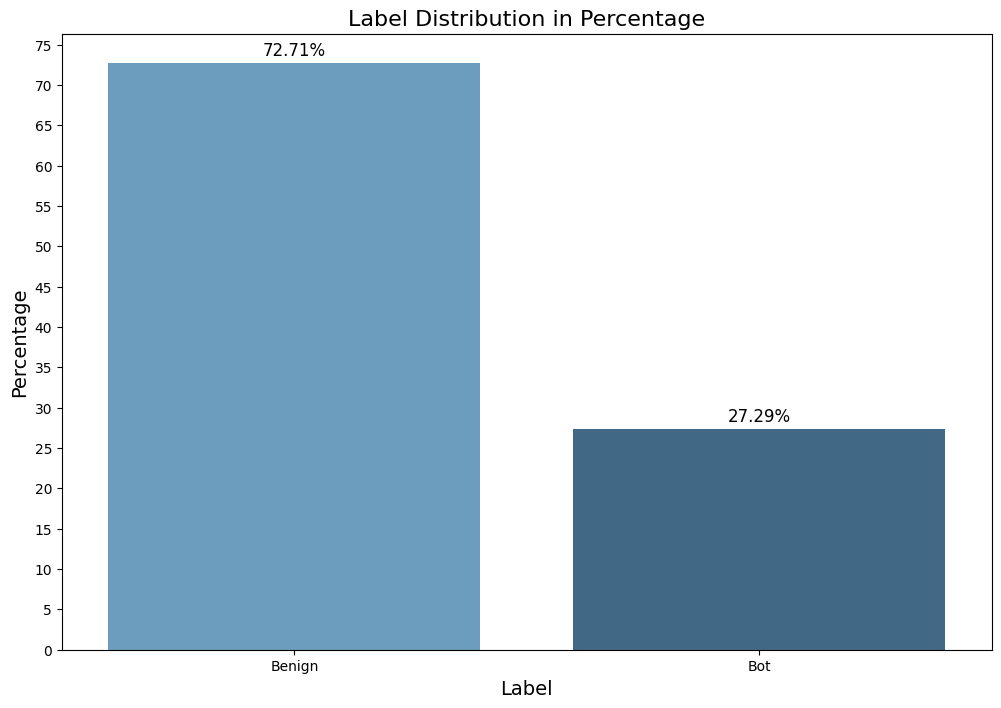

In [12]:
plt.figure(figsize=(12,8))

plt.yticks(np.arange(0, 101, 5))

label_counts = df["Label"].value_counts(normalize=True) * 100

ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")

ax.bar_label(ax.containers[0], fmt="%.2f%%", label_type="edge", fontsize=12, padding=3)
ax.bar_label(ax.containers[1], fmt="%.2f%%", label_type="edge", fontsize=12, padding=3)

plt.xlabel("Label", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.title("Label Distribution in Percentage", fontsize=16)

# Data Cleaning

In [14]:
df = df.drop(columns=['Timestamp'])

In [23]:
df.isna().sum().sum()

np.int64(2558)

In [24]:
reduced_df = df.dropna()